In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [9]:
data = pd.read_csv('./coupang_reviews_20250209_20250810.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              1512 non-null   object
 1   content               1512 non-null   object
 2   score                 1512 non-null   int64 
 3   thumbsUpCount         1512 non-null   int64 
 4   reviewCreatedVersion  1283 non-null   object
 5   at                    1512 non-null   object
 6   replyContent          573 non-null    object
 7   repliedAt             573 non-null    object
 8   appVersion            1283 non-null   object
dtypes: int64(2), object(7)
memory usage: 106.4+ KB


In [11]:
data.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,서연,쿠팡 0 원 왜안됨,1,0,8.8.3,2025-08-09 16:42:08,NaN,NaN,8.8.3
1,곽정석,배송 도착 예정시간을 알 수 없음,1,0,8.8.2,2025-08-09 16:00:14,NaN,NaN,8.8.2
2,qwer 1879,선생님 14000원 쿠폰 준다고 가입 하래서 했는데 쿠폰을 안 줘요 못 받는건가요?,5,0,NaN,2025-08-09 11:15:41,NaN,NaN,NaN
3,Siopy,쿠팡 캐시 얼마 적립되었는지 확인하라는 알림을 안받을 수 있게 선택지를 주세요. 어...,4,0,8.8.3,2025-08-09 10:00:33,NaN,NaN,8.8.3
4,YUJIN IM,주문내역 일자별로 볼 수 있게 돌려놔주세요 이것 때문에 10년만에 리뷰 수정합니다 ...,3,1,8.8.3,2025-08-09 08:26:18,NaN,NaN,8.8.3


# 워드클라우드(2/9-8/9)

In [12]:
data['score'].value_counts()

score
1    757
5    408
3    143
4    115
2     89
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

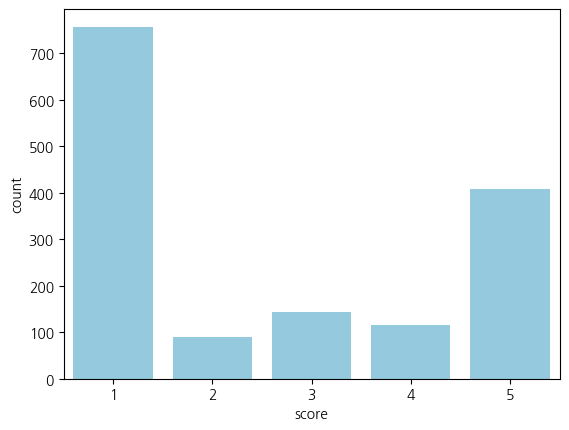

In [13]:
sns.barplot(data['score'].value_counts(), color='skyblue')

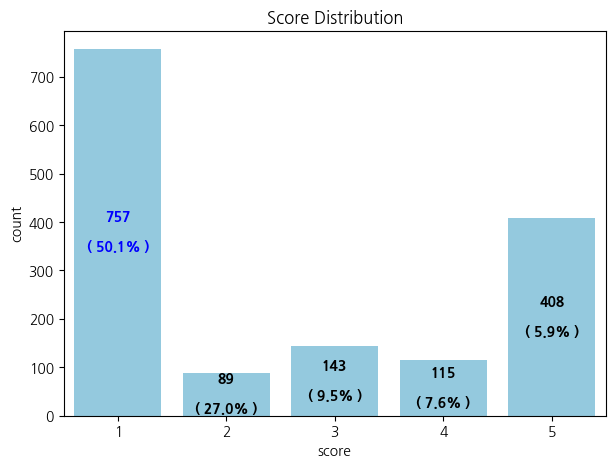

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 점수별 개수와 비율 계산
score_counts = data['score'].value_counts().reset_index()
score_counts.columns = ['score', 'count']
score_counts['pct'] = score_counts['count'] / score_counts['count'].sum() * 100

plt.figure(figsize=(7,5))
ax = sns.barplot(x='score', y='count', data=score_counts, color='skyblue')

# 가장 높은 count의 인덱스
max_idx = score_counts['count'].idxmax()

# 막대별로 라벨 개별 추가
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        label = f"{bar.get_height():.0f}\n\n( {score_counts['pct'].iloc[j]:.1f}% )"
        color = 'blue' if j == max_idx else 'black'
        ax.text(
            bar.get_x() + bar.get_width()/2,      # X 위치 중앙
            bar.get_height()/2,                  # Y 위치 중앙
            label,
            ha='center', va='center',
            color=color, fontsize=10, fontweight='bold'
        )

plt.title("Score Distribution")
plt.show()

In [15]:
import re
def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, x)
    matches = ' '.join(matches)
    return matches

In [16]:
data['content'] = data['content'].apply(text_clean)

In [17]:
from wordcloud import WordCloud
from konlpy.tag import Mecab
mecab = Mecab()

In [18]:
from collections import Counter
import pandas as pd

for i in range(1, 6):
    text_data = data.loc[data['score'] == i, 'content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    # 불용어 세트
    stopwords = set(['쿠팡', '사용', '불편'])

    # 명사 추출 및 필터링
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    # 단어 빈도수 집계
    word_freq = Counter(filtered)
    total_count = sum(word_freq.values())

    # 상위 20개 단어 출력 (원하는 개수로 조정 가능)
    top_words = word_freq.most_common(20)
    df_top_words = pd.DataFrame(top_words, columns=['단어', '빈도수'])
    df_top_words['비율(%)'] = (df_top_words['빈도수'] / total_count * 100).round(2)

    print(f"\n=== 평점 {i}점 리뷰 상위 단어 ===")
    display(df_top_words)


=== 평점 1점 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,광고,185,2.84
1,배송,151,2.32
2,주문,127,1.95
3,상품,110,1.69
4,검색,95,1.46
5,결제,80,1.23
6,리뷰,79,1.21
7,물건,77,1.18
8,가입,69,1.06
9,고객,69,1.06



=== 평점 2점 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,리뷰,27,3.13
1,배송,21,2.44
2,상품,18,2.09
3,검색,17,1.97
4,주문,16,1.86
5,광고,15,1.74
6,구매,14,1.62
7,제품,14,1.62
8,목록,12,1.39
9,결제,10,1.16



=== 평점 3점 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,상품,31,2.95
1,주문,28,2.66
2,배송,22,2.09
3,업데이트,20,1.90
4,검색,20,1.90
5,결제,16,1.52
6,구매,14,1.33
7,광고,14,1.33
8,확인,11,1.05
9,로켓,11,1.05



=== 평점 4점 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,배송,32,4.78
1,상품,15,2.24
2,주문,15,2.24
3,결제,15,2.24
4,카드,13,1.94
5,로켓,12,1.79
6,검색,11,1.64
7,목록,10,1.49
8,쿠폰,10,1.49
9,리뷰,8,1.19



=== 평점 5점 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,배송,59,4.19
1,감사,30,2.13
2,가격,28,1.99
3,상품,27,1.92
4,리뷰,27,1.92
5,주문,24,1.71
6,편리,20,1.42
7,최고,19,1.35
8,만족,17,1.21
9,쇼핑,15,1.07


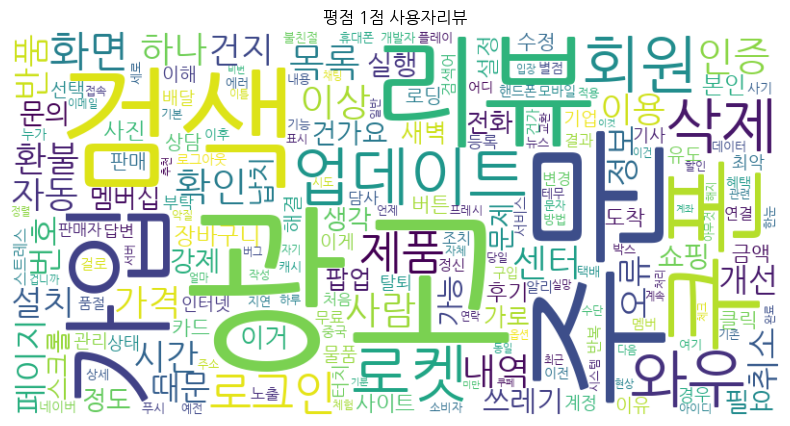

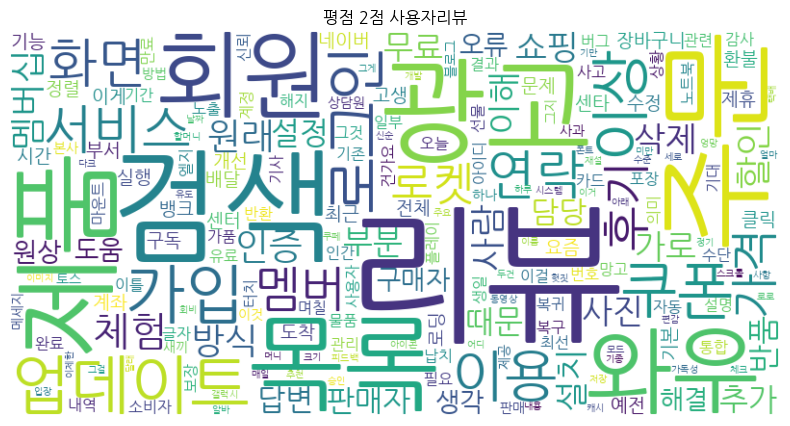

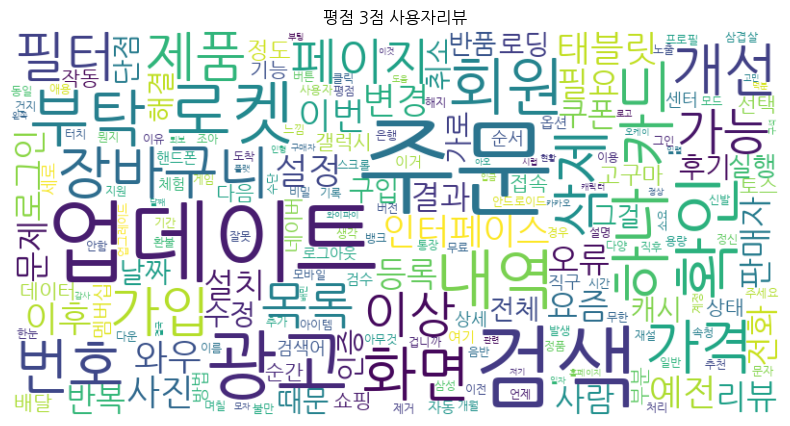

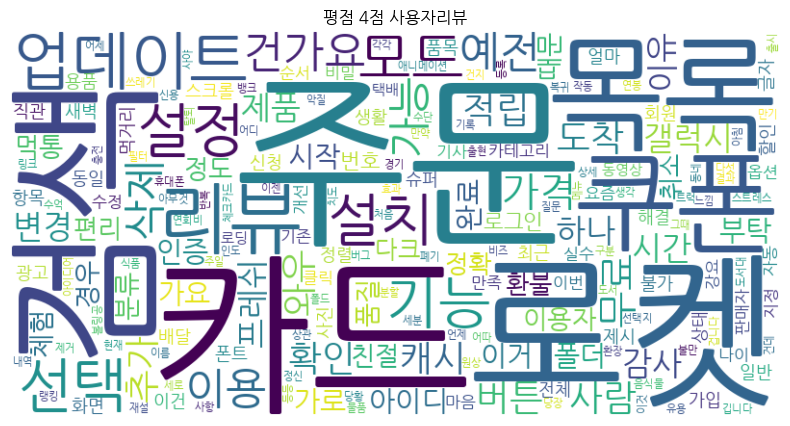

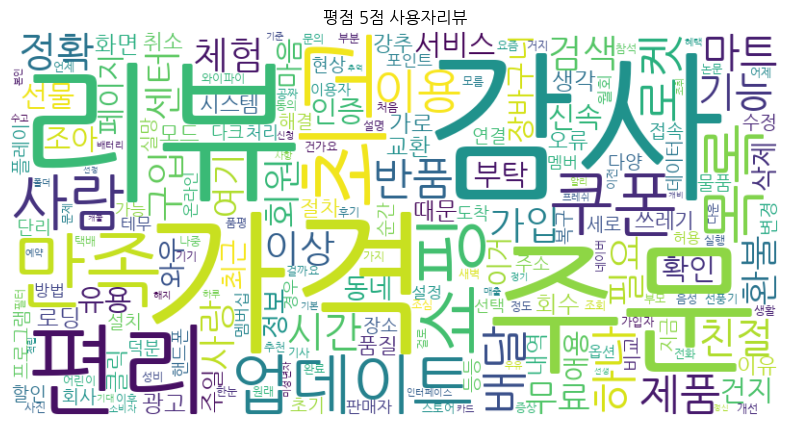

In [28]:
for i in range(1,6):
    
    text_data = data.loc[data['score']==i,'content'].astype(str).tolist()
    full_text = ' '.join(text_data)

    # 불용어 세트 생성
    stopwords = set(['쿠팡', '사용', '불편', '상품', '짜증', '배송', '구매', '결제', '물건', '고객'])

    # 명사 추출
    nouns = mecab.nouns(full_text)
    filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

    # 빈도수 집계
    from collections import Counter
    word_freq = Counter(filtered)

    # 워드클라우드 생성
    wc = WordCloud(
            font_path='NanumGothic.ttf',
            background_color='white',
            width=800,
            height=400).generate_from_frequencies(word_freq)

    # 시각화
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"평점 {i}점 사용자리뷰")
    plt.show()

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 공감

In [21]:
# 공감 상위 5% 뽑기
percent = 5
n_top = int(len(data) * (percent / 100))

top_p = (
    data
    .sort_values('thumbsUpCount', ascending=False)
    .loc[:, ['score', 'content', 'thumbsUpCount', 'at']]
    .head(n_top)
)

In [22]:
top_p

,score,content,thumbsUpCount,at
772,5,쿠팡 초창기 부터 지금까지 잘 사용하고 있습니다 다만 이거 하나만 수정 부탁드립니다 작년 가을쯤 부터 쿠팡앱 알림이 안울리는 현상이 있습니다 특히 배송완료 알림이 심각합니다 알림이 안울리거나 도착하고 5 10분이상 지나서 울리거나 쿠팡앱을 열어볼때까지 안울립니다 폰 문제인가 싶어서 플립4 사용하다가 어제 s25 엣지로 바꿨는데도 증상이 똑같습니다 다른 앱들은 멀쩡한데 딱 쿠팡앱 하나만 이런증상이 있습니다 꼭 좀 수정 부탁드리겠습니다,986,2025-05-22 18:41:03
796,4,배송하는 시간은 완전히 빨라서 오히려 더욱 편리하고 가격도 무척 저렴하는데 문제는 쿠팡캐시 포인트를 적립하는 것 때문에 카드로 결제하면 결국 아예 쌓이지는 않고 심지어 그냥 무조건 계좌이체를 신청했을 때에만 잘 들어오네요,797,2025-05-19 20:28:05
1145,1,사용자가 원하지 않을 때 자동으로 백그라운드에 상주하는 앱 쿠팡과 관련된 그 어떠한 링크를 클릭하지 않아도 슬크머니 켜져있음 앱에 대한 권한을 모두 차단하거나 삭제 배터리 설정을 제한하더라도 소용이 없는 앱 지금껏 사용했던 어플리케이션보다 권한 설정에 있어서 불편한 점이 많은 앱,689,2025-03-28 03:45:18
494,5,6 26 왜 또 다시 주문목록이 가로가 되었나요 제발 원래대로 바꿔주세요 불편하다는 그렇게 많은데 왜 자꾸 보기 불편하게 만드시는 걸까요 원상복구 시켜주세요 5 3 주문목록 좀 원래대로 바꿔주세요 진짜 너무 불편하다고요 5 8 주문목록 가로로 바꿔놔서 불편하다는 사람 엄청 많았나봐요 금방 다시 되돌려놨나했는데 도대체 뭐하자는 건지 이번에는 아예 숨겨버렸네요 한번 더 클릭해야 볼 수 있게 만들었고 교환반품은 조회를 몇번씩이나 클릭해야 확인 할 수 있게 만들어놨네요 가입자 많이 만들고나니 교환반품이 감당이 안되나요 비양심적인 교환반품 사례도 늘고있을테고요 쿠팡은 여러모로 쓰기 좋은 어플입니다 특히 주부들한테는 더더욱이죠 그런데 왜 자꾸 사용하기 어렵게 만들어놓나요 2990원일때부터 꾸준히 사용해왔다구요 진짜 기존 가입자들 떠나고 싶게 만드는 요즘의 후퇴하는 업데이트 그만 멈춰주세요,641,2025-06-26 15:22:02
815,5,최근 업데이트 후 인터페이스가 너무 불편해졌어요 메인 하단의 마이쿠팡 4번째 사람모양 아이콘 터치하면 주문내역이 세로로 한번에 떴었는데 딱 배송현황을 한눈에 볼 수 있어서 정말 유용했는데 지금은 아예 뜨지를 않습니다 그나마 확인하려면 주문내역 들어가서 취소된 것이랑 배송중인 것이랑 배송완료인 것이랑 뒤죽박죽 섞인 걸로 봐야하는데 너무 불편합니다 앱 다운그레이드 시키고 싶네요 제발 예전처럼 인터페이스 복구 좀 해주세요 복구 감사합니다,617,2025-05-16 13:50:59
893,1,광고가 어찌나 심한지 뉴스 기사같은거 보다가 잘못눌러서 스치기만해도 실행됨 납치되면 백버튼을 여섯일곱번을 눌러야 되는데 아주 짜증나는 경험이네요 욕이 저절로 튀어나옵니다 웃기는건 오래전부터 사용자들이 이런 불만 얘기해도 고치려는 노력은 단 1도 안한다는거임,485,2025-05-04 11:21:53
435,1,검색할 때 상품목록 정렬을 낮은금액순으로 설정하면 특히 로켓 항목에 체크표시할 경우 상품목록이 실제 낮은금액순으로 나오는게 아니라 검색어와 전혀 상관없는 엉뚱한 상품들이 잔뜩 나타나면서 동시에 상품가격 순서도 중구난방 뒤죽박죽으로 나타나는 이상한 문제가 몇년째 계속 되고 있는데 왜 아직도 안고치는지 모르겠네요 이 문제로 고객센테에 불편사항 접수한게 한두번이 아니었는데 말입니다 일부러 그러는건가요 고객이 가격 싼 물건 말고 비싼 물건만 주문하도록 유도하려는 꼼수를 부리느라 그러는건지,308,2025-07-01 19:46:27
498,3,갑자기 로그아웃 되더니 로그인 오류가 떠요,286,2025-06-26 09:45:22
1511,1,업데이트 후 앱이 너무 버벅거리고 먹통이 자주 되네요 쿠팡 쿠팡 플레이 모두 앱 최적화 문제가 많은거 같네요 최신 안드로이드만 신경 쓰고 오래된 버전은 아예 신경도 안쓰는거 같네요 옛날 갤럭시 탭이 하나 있는데 다른 앱 들은 모두 잘되는데 쿠팡 쿠팡플레이만 문제가 많아요,282,2025-02-09 00:46:40
1327,1,The problem of sudden log out 분명이 마이페이지에 이름과 함께 등록한 개인 정보가 표시됨에도 결제 시 로그인 화면으로 넘어감 와우 결제를 누르면 회원님께서는 와우 회원입니다 라고 분명히 뜨는데도 정작 결제하려면 로그인을 하라고 함 심지어 자동 로그인을 사용하고 있음에도 벌어진 자동 로그아웃이었기에 원인 파악도 할 수 없음 문제 발생 원인을 알려주길 바람,272,2025-02-27 15:23:37


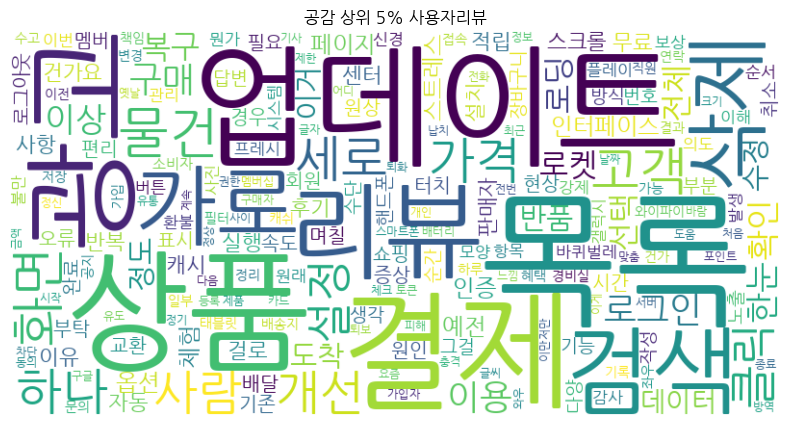

In [26]:
text_data = top_p['content'].astype(str).tolist()
full_text = ' '.join(text_data)

# 불용어 세트 생성
stopwords = set(['쿠팡', '사용', '불편', '짜증', '주문', '때문', '문제', '건지', '배송', '내역'])

# 명사 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 빈도수 집계
from collections import Counter
word_freq = Counter(filtered)

# 워드클라우드 생성
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"공감 상위 5% 사용자리뷰")
plt.show()

In [24]:
total_count = sum(word_freq.values())

# 상위 20개 단어 출력 (원하는 개수로 조정 가능)
top_words = word_freq.most_common(20)
df_top_words = pd.DataFrame(top_words, columns=['단어', '빈도수'])
df_top_words['비율(%)'] = (df_top_words['빈도수'] / total_count * 100).round(2)

print(f"\n=== top50 리뷰 상위 단어 ===")
display(df_top_words)


=== top50 리뷰 상위 단어 ===


,단어,빈도수,비율(%)
0,배송,34,2.42
1,목록,31,2.21
2,업데이트,25,1.78
3,상품,25,1.78
4,결제,23,1.64
5,내역,20,1.42
6,광고,20,1.42
7,리뷰,18,1.28
8,검색,16,1.14
9,가로,15,1.07


## 가로

In [19]:
width = data.loc[
    data['content'].str.contains('계좌|통장') & data['content'].str.contains('순서|목록|홈|메인|3개|리스트|자주쓰는|자주 쓰는'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [107]:
width = data.loc[
    data['content'].str.contains('주문|배송내역') & data['content'].str.contains('가로|세로|좌우|상하'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [38]:
width.to_csv('./width리뷰.csv',encoding='utf-8')

In [108]:
width.sort_values('thumbsUpCount', ascending=False)

,content,score,thumbsUpCount,appVersion,at
494,6 26 왜 또 다시 주문목록이 가로가 되었나요 제발 원래대로 바꿔주세요 불편하다는 그렇게 많은데 왜 자꾸 보기 불편하게 만드시는 걸까요 원상복구 시켜주세요 5 3 주문목록 좀 원래대로 바꿔주세요 진짜 너무 불편하다고요 5 8 주문목록 가로로 바꿔놔서 불편하다는 사람 엄청 많았나봐요 금방 다시 되돌려놨나했는데 도대체 뭐하자는 건지 이번에는 아예 숨겨버렸네요 한번 더 클릭해야 볼 수 있게 만들었고 교환반품은 조회를 몇번씩이나 클릭해야 확인 할 수 있게 만들어놨네요 가입자 많이 만들고나니 교환반품이 감당이 안되나요 비양심적인 교환반품 사례도 늘고있을테고요 쿠팡은 여러모로 쓰기 좋은 어플입니다 특히 주부들한테는 더더욱이죠 그런데 왜 자꾸 사용하기 어렵게 만들어놓나요 2990원일때부터 꾸준히 사용해왔다구요 진짜 기존 가입자들 떠나고 싶게 만드는 요즘의 후퇴하는 업데이트 그만 멈춰주세요,5,641,8.7.6,2025-06-26 15:22:02
815,최근 업데이트 후 인터페이스가 너무 불편해졌어요 메인 하단의 마이쿠팡 4번째 사람모양 아이콘 터치하면 주문내역이 세로로 한번에 떴었는데 딱 배송현황을 한눈에 볼 수 있어서 정말 유용했는데 지금은 아예 뜨지를 않습니다 그나마 확인하려면 주문내역 들어가서 취소된 것이랑 배송중인 것이랑 배송완료인 것이랑 뒤죽박죽 섞인 걸로 봐야하는데 너무 불편합니다 앱 다운그레이드 시키고 싶네요 제발 예전처럼 인터페이스 복구 좀 해주세요 복구 감사합니다,5,617,8.7.1,2025-05-16 13:50:59
328,주문목록 보는 걸 또 불편하게 하네 진짜 가로병 에 걸렸냐 그냥 기존 보던 세로로 하라고요 좀 그전에 업데이트 할때도 주문목록에 불편사항 있었잖아요 왜 그래요 도대체,1,259,8.7.8,2025-07-09 19:39:10
905,주문목록 왜 좌우로 바꼈나요 심지어 전부 나오지도 않아요 너무 불편해서 스트레스 받네요 자주 이용하고 시킬때 많이 시켜서 확인해야하는데 전체 내역보기로 보면 완료된거 취소한거 사이사이에 배송중인걸 확인해야하니 번거로움이 이만저만이 아닙니다 삭제하고 다시 깔아봐도 똑같이 좌우로 보는거네요 옵션설정좀 만들어주세요,1,111,8.6.9,2025-05-03 08:16:28
215,주문전체내역보기가 세로 밑에서 위로 터치하는 화면에서 지금 가로 오른쪽으로 넘기는 화면이 되어 있음 너무 불편함 고객센터에 전화해서 문의하니 삭제하고 다시 설치하라고 해서 지금 10번이상 했는데도 안됨 유심사건때문에 스트레스가 어마어마한데 더 스트레스가 싸이는중 전번6월달부터 화면이 또 가로로 보이기 시작한다 스트레스가 이만저만이 아니다 로그아웃 했다가 삭제 했다가 다시 수십번을 깐다 쿠팡 사람들 퇴보 되는 업데이트로 월급을 받아가나 보네 누가 문제일까 사장 직원 일부러 그러는건가 불편하다는 사람들이 많다고 하는데 꾸여꾸역 놔두는 이유가 뭔지,1,98,8.8.0,2025-07-20 18:06:06
623,편리함 하나때문에 엄청 애용했는데 갈수록 쓰기싫고 퇴화되게 만드는듯 심지어 수시로 멋대로 바껴져있음 저번에도 리뷰남겼었는데 소비자말 개무시함 이 정도면 이렇게 만들자고 한 사람 진정성이 의심될정도 장바구니목록 그 전처럼 로켓배송 일반배송 나뉘어지기 바람 로켓배송 담은거 찾는데 뒤죽박죽 섞여서 목록도 밀리고 더 찾아봐야는 수고로움을 왜 해야는지 모르겠음 주문목록 한 눈에 보이기 원상복귀 그 전에 세로로 직관적으로 한 눈에 잘만 보이던걸 가로로 바꿔서 크기만 커서 몇개 보이지도 않고 배송중 도 안보이고 왜 이딴식으로 만든건지 도무지 이해가 안 감 왜 굳이 전체보기로 또 들어가서 또 보는 수고로움을 더해야는지 그것마저 목록1개당 너무크고 일자도 다 섞여서 잘 보이지도 않아서 개 안그래도 장바구니 때문에 1차 스트레스가 있었는데 하다하다 돈 주고산 목록 보는데도 스트레스 작렬임 주문목록 그 전처럼 오늘도착배송 내일도착배송 자동분류도 안되서 뒤죽박죽 개 남 진짜,1,83,8.7.4,2025-06-09 13:50:08
908,쿠팡 앱 로그인시 인터페이스 불만 사람모양 버튼 누르면 이전엔 세로로 한눈에 주문진행상황 볼수있었는데 지금은 업데이트후 가로로 여러번 왔다갔다 해야하네요 그 것 도 한 개 씩 앱 인터페이스 이번에 바꾼사람 생각이 진짜 특이한 사람같네요 건의좀 해주시겠어요 진짜 쓸맛 안날정도로 인터페이스가 밥맛이 되었네요,3,75,8.6.9,2025-05-02 13:34:30
1086,쿠팡서주문한 충전기원인으로 블루투스이어폰 과 보조배터리4대가 녹아내리거나 탄내에 고장나고 화재가날뻔했는데도 판매자의 원인모를 책임질수없다는 입장을 쿠팡서 대변할뿐 물건만팔고 중계할뿐이지 책임회피하기 바쁘고 문제있는판매자는 버젓이 같은상품 판매중 과충전등4가지보호라는 허위광고에 심지어 kc인증 쿠팡도 한통속이라 쿠팡서 물건사서 화재나거나 문제가 생겨도 구매자책임 또한 주문을 하지 않았는데 같은기종 케이스랑 필름 검색한 물품 3건 2건은 같은판매자 같은 물품 이 비슷한 시간대에 3번 나눠서 결재되서 고객센터에 물어보니 시스템상에 문제가 없고 주문이 폰에서 이루어져서 어쩔수 없다는데 쓰지도 못하는 똑같은 케이스와 필름이 잔뜩와서 반품하려니 각각 반품배송비를 내야하는 황당한 상황 그리고실행한적없는 쿠팡이 자꾸뜰때 부터 이상하다 했는데 조심하셔야할듯 검색해보니 같은 피해자들이 많음 그리고 쿠팡알림이고 구글광고도 다차단했지만 폰을켜거나 또는 지혼자 쿠팡광고가뜸 어플삭제 밖에 방법이 없는,1,52,6.5.8,2025-04-07 12:09:04
48,주문내역이 자꾸 이상하게 바뀌네요 원래 날짜별로 보였는데 갑자기 죄다 합쳐지고 가독성이 너무 안좋게 변해서 언제 이걸 샀는지 알기가 너무 어려워요 기존 방식대로 했다가 바뀌고 다시 원상복귀 되었길래 별로라는 피드백이 있어서 바꿨나 했는데 다시 이상하게 바뀌었네요 요새 자꾸 불편해지는 거 같은데 원래대로 복구 좀 해주세요 주문목록이나 결제수단 같은거 바꾸지 말아주세요 결제수단도 좀 불편하게 해뒀다가 다시 원상복구 했던데 주문목록도 제발 다시 돌려놔주세요 굉장히 불편해요 이 UI를 생각한 분이 사용해보지 않고 승인했나 싶습니다 읽어주셔서 감사합니다,2,40,NaN,2025-08-06 01:08:32
330,갈수록 안좋아지네 해지할까 생각중 입니다 주문내역을 살펴 보기 힘들게 가로로 해놓는 이유가 뭡니까 갈수록 불편해지고 물건도 다양하게 없고 다른곳 보다 비싼 물건도 많고 공지도 없이 오후에 살펴 보니 주문내역 보는게 갑자기 바껴 있네요 제가 주문한 상품을 보려면 몇번을 클릭하고 화면을 넘겨야하는지 넘 불편하고 해지하고 싶어지네요,1,23,8.7.8,2025-07-09 18:51:09


In [109]:
width.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 48 to 1086
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        33 non-null     object
 1   score          33 non-null     int64 
 2   thumbsUpCount  33 non-null     int64 
 3   appVersion     30 non-null     object
 4   at             33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [36]:
data['thumbsUpCount'].sum()

10962

In [100]:
width['thumbsUpCount'].sum()

2176

<Axes: xlabel='score', ylabel='count'>

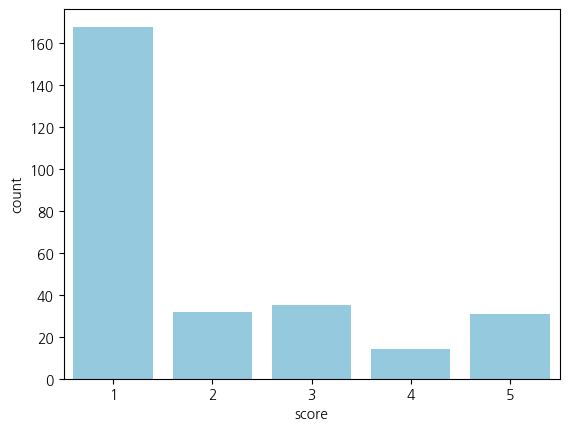

In [26]:
sns.barplot(width['score'].value_counts(), color='skyblue')

전체 리뷰 수: 1512
width 리뷰 수: 33 (2.18%)


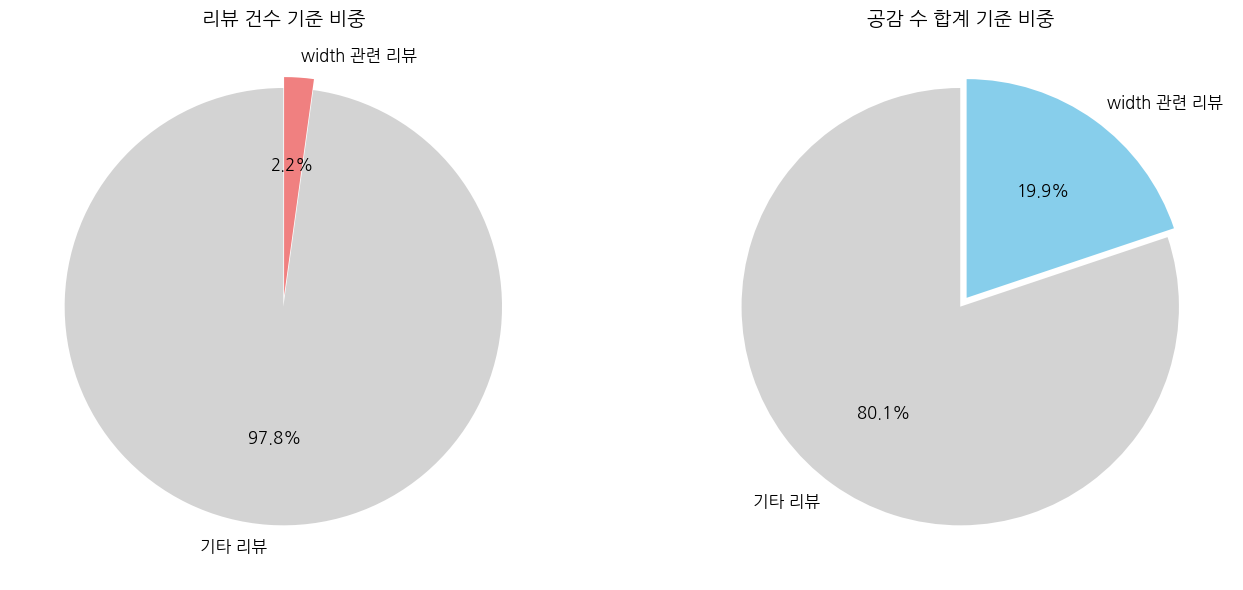

In [110]:
import matplotlib.pyplot as plt

# width 조건
# width = data.loc[
#     data['content'].str.contains('가로'),
#     ['content','score','thumbsUpCount','appVersion','at']
# ]

# 개수 비교
total_count = len(data)
width_count = len(width)
percent = width_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"width 리뷰 수: {width_count} ({percent:.2f}%)")

# thumbsUpCount 합
width_thumbs_sum = width['thumbsUpCount'].sum()
other_thumbs_sum = data['thumbsUpCount'].sum() - width_thumbs_sum

labels = ['width 관련 리뷰', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [width_count, total_count - width_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=14)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [width_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=14)

plt.tight_layout()
plt.show()

## 광고

In [29]:
ad = data.loc[
    data['content'].str.contains('광고'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [30]:
ad.sort_values('thumbsUpCount', ascending=False)

,content,score,thumbsUpCount,appVersion,at
893,광고가 어찌나 심한지 뉴스 기사같은거 보다가 잘못눌러서 스치기만해도 실행됨 납치되면 백버튼을 여섯일곱번을 눌러야 되는데 아주 짜증나는 경험이네요 욕이 저절로 튀어나옵니다 웃기는건 오래전부터 사용자들이 이런 불만 얘기해도 고치려는 노력은 단 1도 안한다는거임,1,485,8.6.9,2025-05-04 11:21:53
1367,too many invasive internet pop up ads that force open the app when trying to close it 앱 강제로 열리게 하는 인터넷 광고 좀 없애세요 리뷰 수정 리뷰 답변 내용으로 이는 쿠팡에서 의도한 바가 아니고 구글 맞춤형 광고 설정을 끄면 해결된다는데 쿠팡에서 의도하지 않았으면 어떻게 손이 스치기만 해도 클릭이 되며 앱이 열리는 광고가 죄다 쿠팡 광고밖에 없으며 왜 쿠팡 때문에 제가 맞춤형 광고를 꺼야 하는지 이해를 못하겠네요,1,151,8.5.9,2025-02-22 16:42:42
583,정말 적당히 광고가 뜨면 좋겠네요 요 며칠 핸드폰 사용만해도 쿠팡광고가 너무 떠요 한번뜨고 나가기 눌러 나가면 그걸 두세번 반복을 해야합니다 문제는 그냥 화면만 켜놓을때 켜지는건 상관없는데 뭘 하기만 하면 켜지니 너무 불편합니다 예를들어 이미 쿠팡앱을 실행중인데 다시 떠서 재 검색을 하고 다시 들어가고 그걸 광고가 한번 뜨는 순간 두세번을 반복해야 안떠요 이게 하루에도 몇번씩 무작위로 뜨다보니 핸드폰으로 뭘 하다가도 어느순간 그걸 계속 반복하다보니 삭제를 했었는데 그래도 떠요 핸드폰을 하다보면 광고를 안볼수가 없는데 이거 어떻게 개선안되나요,3,118,8.7.4,2025-06-14 22:40:06
532,최근들어 스마트폰 화면 하단 내비게이션 바 쪽에 바짝 붙여서 쿠팡 광고배치하고 강제로 쿠팡 앱 띄우는걸로 유도하는 현상이 너무 잦아서 사용자 입장에서 매우 불편함이 크게 느껴짐 쿠팡 광고 팝업이 보일때면 최대한 터치 안하려고 신경쓰면서 여러번 테스트해봤는데 악의적인 납치광고가 심하게 의심됨,1,79,8.7.6,2025-06-23 15:00:39
467,다른건 모르겠고 어느순간부터 논문을 써놓은 체험단리뷰가 너무 많아서 오히려 광고같이 느껴집니다 적어도 체험단 리뷰 거를 수 있게 필터 기능이라도 만들어주세요 원하지 않는 논문 광고 거르고보느라 너무 피로합니다,5,59,8.7.7,2025-06-29 02:24:55
1086,쿠팡서주문한 충전기원인으로 블루투스이어폰 과 보조배터리4대가 녹아내리거나 탄내에 고장나고 화재가날뻔했는데도 판매자의 원인모를 책임질수없다는 입장을 쿠팡서 대변할뿐 물건만팔고 중계할뿐이지 책임회피하기 바쁘고 문제있는판매자는 버젓이 같은상품 판매중 과충전등4가지보호라는 허위광고에 심지어 kc인증 쿠팡도 한통속이라 쿠팡서 물건사서 화재나거나 문제가 생겨도 구매자책임 또한 주문을 하지 않았는데 같은기종 케이스랑 필름 검색한 물품 3건 2건은 같은판매자 같은 물품 이 비슷한 시간대에 3번 나눠서 결재되서 고객센터에 물어보니 시스템상에 문제가 없고 주문이 폰에서 이루어져서 어쩔수 없다는데 쓰지도 못하는 똑같은 케이스와 필름이 잔뜩와서 반품하려니 각각 반품배송비를 내야하는 황당한 상황 그리고실행한적없는 쿠팡이 자꾸뜰때 부터 이상하다 했는데 조심하셔야할듯 검색해보니 같은 피해자들이 많음 그리고 쿠팡알림이고 구글광고도 다차단했지만 폰을켜거나 또는 지혼자 쿠팡광고가뜸 어플삭제 밖에 방법이 없는,1,52,6.5.8,2025-04-07 12:09:04
106,카카오뱅크 시럽이나 오케이 캐시백 앱 등의 쿠팡 광고에서 자주 다운이 잘 되서 덕분에 폰을 재부팅을 하게됩니다 지금도 다운이 되어 짜증나는데 어떨땐 시간이 좀 지나면 다시 원활히 될때도 있어요 급하게 뭘 구매하려고 검색할때 짜증이 나고 배달에도 쿠팡이츠를 이용하는데 할 수 없이 배민에서 시킵니다,3,22,8.8.1,2025-07-31 22:40:35
1482,쿠팡 멤버십 이용중인데 PC에서나 모바일에서는 광고가 많긴하지만 앱 사용이 불편하다는 느낌은 없는데 태블릿에서의 사용성은 최악이네요 태블릿에서도 PC처럼 가로로 긴 화면을 제공해준다면 좋을 것 같아요 태블릿에서의 사용성만 개선해준다면 좋을 것 같습니다,3,14,8.5.7,2025-02-11 11:52:05
288,물건 검색하는데 검색한거랑 완전히 상이한 제품을 자꾸 집어넣거나 아예 그걸로 도배됨 가령 옷을 검색하면 옷이 아니라 휴대폰 악세사리 같은게 뜨는 식임 이거 좀 아니지 않음 멤버쉽비용내고는 광고도 엄청 보고 필요없는 물건도 검색되도록 만들고 뭐하는짓임,1,11,8.7.9,2025-07-12 23:59:58
384,쿠팡와우로 주문했는데 배송지연 언제오는지도 모름 기사연락처도 안내안됨 미안하다고 1000원쿠폰준다네 내거 거지도 아니고 거지면 한달에 한두번주문하는거 와우회원도 안했지 편리때문에 했는데 고객을 호구로 만드네 이따윈데 와우회원가입은 왜시키냐 그리고 물건은 하염없이 기다려야하냐 급해서 와우로 시켰는데 기약도없네 별쓰레기같은 광고는 다하는 것들이,1,6,8.7.7,2025-07-04 20:56:40


In [31]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 16 to 1489
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        159 non-null    object
 1   score          159 non-null    int64 
 2   thumbsUpCount  159 non-null    int64 
 3   appVersion     134 non-null    object
 4   at             159 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.5+ KB


## 검색

In [123]:
sign = data.loc[
    data['content'].str.contains('검색'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [124]:
sign.sort_values('thumbsUpCount', ascending=False)

,content,score,thumbsUpCount,appVersion,at
435,검색할 때 상품목록 정렬을 낮은금액순으로 설정하면 특히 로켓 항목에 체크표시할 경우 상품목록이 실제 낮은금액순으로 나오는게 아니라 검색어와 전혀 상관없는 엉뚱한 상품들이 잔뜩 나타나면서 동시에 상품가격 순서도 중구난방 뒤죽박죽으로 나타나는 이상한 문제가 몇년째 계속 되고 있는데 왜 아직도 안고치는지 모르겠네요 이 문제로 고객센테에 불편사항 접수한게 한두번이 아니었는데 말입니다 일부러 그러는건가요 고객이 가격 싼 물건 말고 비싼 물건만 주문하도록 유도하려는 꼼수를 부리느라 그러는건지,1,308,8.7.7,2025-07-01 19:46:27
433,업데이트 될수록 UI가 퇴화하는 어플 사진에 이상한 비네팅 효과는 대체 언제 없애나요 후기보는 방식이 옛날이 훨씬 편하고 좋았는데 세로 스크롤방식으로 바뀌고 완전 불편해요 후기 글자수 제한 좀 만들어주세요 고의적으로 스크롤압박하는 후기들이 너무 많아서 짜증나요 며칠 전 업데이트로 상품목록 글씨 사진 크기는 뭐이리 커진건지 어이가없네요 그리고 검색하면 엉뚱한 제품들 아에 안 나오게 좀 해주세요,1,149,8.7.7,2025-07-01 23:05:46
1485,쿠팡 너무 잘쓰고 있습니다 쿠팡을 알기전엔 어떻게 살았나 싶을 정도였는데 간간히 보이는 리뷰들처럼 옵션이 생기면서 아무나 하나 걸리라는 식에 말도 안되는 가격으로 옵션을 넣는 판매자가 생기기 시작했더라구요 그냥 아무생각 없이 수량만 선택하거나 검색한 상품 클릭해 들어간 페이지에서 옵션이라도 재선택하면 가격이 두세배 높은가격으로 바뀌는 어메이징한 경우도 너무 많이 봤어요 ex 파운데이션 같은 경우 호수만 바꾸어도 갑자기 가격이 달라짐 물론 반품 교환 환불 시스템이 잘되어 있는 쿠팡이지만 소비자로서 번거로운건 사실이니까요 한편으로는 사기 당한것같은 배신감도 들고요 그런 점만 주의해서 쇼핑하면 진짜 쇼핑 천국이 따로 없습니다 와우멤버십 짜릿행 근데 울동네는 로켓프레시 서비스 언제 되나요,5,133,NaN,2025-02-11 00:35:25
583,정말 적당히 광고가 뜨면 좋겠네요 요 며칠 핸드폰 사용만해도 쿠팡광고가 너무 떠요 한번뜨고 나가기 눌러 나가면 그걸 두세번 반복을 해야합니다 문제는 그냥 화면만 켜놓을때 켜지는건 상관없는데 뭘 하기만 하면 켜지니 너무 불편합니다 예를들어 이미 쿠팡앱을 실행중인데 다시 떠서 재 검색을 하고 다시 들어가고 그걸 광고가 한번 뜨는 순간 두세번을 반복해야 안떠요 이게 하루에도 몇번씩 무작위로 뜨다보니 핸드폰으로 뭘 하다가도 어느순간 그걸 계속 반복하다보니 삭제를 했었는데 그래도 떠요 핸드폰을 하다보면 광고를 안볼수가 없는데 이거 어떻게 개선안되나요,3,118,8.7.4,2025-06-14 22:40:06
121,글자 수 제한 때문에 다시 작성합니다 제 이전 작성글 궁금하신 분들은 제 닉네임 우측에 있는 점세개 누르고 수정 내역 보기 누르면 이전 리뷰 보실 수 있습니다 검색 기록 삭제로 인해서 리뷰 작성했고 결국엔 복구 못 해준다는 답변 받았습니다 많은 분들이 아셔야할듯 해서 리뷰에 이렇게 남깁니다 수정 받은 답변 모두 정리해보자면 업데이트 사항도 절대 못 알려준답니다 검색기록 없어지면 복구도 못 해준다고 하고 앱 업데이트시 무엇이 업데이트 되는지도 알려줄 수 없다고 합니다 그냥 다 비밀인가 봅니다 업데이트 안 하고 버티고 있었는데 어느순간에 업데이트가 되어있었고 검색기록도 더이상 사라지지 않았습니다 그냥 일부 고객들 상대로 테스트 해본것 같습니다 몇번을 문의해도 절대 복구 못한다는 듯이 말해놓고 은근슬쩍 다시 돌려놨네요 상담사들한테 물어봐야 다 말이 다릅니다 누구는 공지했다고 거짓말 하고 누구는 인앱 공지에 보면 나온다고 자기 할말만 하고 도움이 안 됩니다,1,79,8.8.1,2025-07-30 20:02:08
402,쿠팡어플을 와이파이에서 접속하면 상품리뷰 0 이라고 나옴니다 데이터로 접속하면 상품리뷰가 정상적으로 나오구요 데이터로 쿠팡어플을 일단접속후 와이파이로 전환하면 해당페이지는 와이파이에서도 리뷰가 보이나 다른상품을 검색하면 리뷰가 역시 안나옴니다,5,63,8.7.7,2025-07-03 10:56:11
1086,쿠팡서주문한 충전기원인으로 블루투스이어폰 과 보조배터리4대가 녹아내리거나 탄내에 고장나고 화재가날뻔했는데도 판매자의 원인모를 책임질수없다는 입장을 쿠팡서 대변할뿐 물건만팔고 중계할뿐이지 책임회피하기 바쁘고 문제있는판매자는 버젓이 같은상품 판매중 과충전등4가지보호라는 허위광고에 심지어 kc인증 쿠팡도 한통속이라 쿠팡서 물건사서 화재나거나 문제가 생겨도 구매자책임 또한 주문을 하지 않았는데 같은기종 케이스랑 필름 검색한 물품 3건 2건은 같은판매자 같은 물품 이 비슷한 시간대에 3번 나눠서 결재되서 고객센터에 물어보니 시스템상에 문제가 없고 주문이 폰에서 이루어져서 어쩔수 없다는데 쓰지도 못하는 똑같은 케이스와 필름이 잔뜩와서 반품하려니 각각 반품배송비를 내야하는 황당한 상황 그리고실행한적없는 쿠팡이 자꾸뜰때 부터 이상하다 했는데 조심하셔야할듯 검색해보니 같은 피해자들이 많음 그리고 쿠팡알림이고 구글광고도 다차단했지만 폰을켜거나 또는 지혼자 쿠팡광고가뜸 어플삭제 밖에 방법이 없는,1,52,6.5.8,2025-04-07 12:09:04
806,주문목록 검색좀 고치세요 코코볼 검색했는데 타이벡 딸기가 도대체 왜 튀어나오나요 일부러 다른상품 노출시키는것좀 적당히 하세요,1,40,8.7.1,2025-05-18 08:24:24
754,이번 업데이트 후 어플에서 상품을 검색한후 낮은가격순 등 필터 설정시 검색결과의 정확도가 이상한것 같아요 예를들어 삼겹살을 검색하면 삼겹살만 먼저 노출되지않고 상추나 콩나물 두부가 상위결과에 나옵니다 전체결과보기 체크박스를 선택하지않아도 동일하네요 가격비교가 어려워 구매하는데 매우 불편합니다,3,32,8.7.2,2025-05-24 22:02:59
106,카카오뱅크 시럽이나 오케이 캐시백 앱 등의 쿠팡 광고에서 자주 다운이 잘 되서 덕분에 폰을 재부팅을 하게됩니다 지금도 다운이 되어 짜증나는데 어떨땐 시간이 좀 지나면 다시 원활히 될때도 있어요 급하게 뭘 구매하려고 검색할때 짜증이 나고 배달에도 쿠팡이츠를 이용하는데 할 수 없이 배민에서 시킵니다,3,22,8.8.1,2025-07-31 22:40:35


In [125]:
sign.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 28 to 1497
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        98 non-null     object
 1   score          98 non-null     int64 
 2   thumbsUpCount  98 non-null     int64 
 3   appVersion     93 non-null     object
 4   at             98 non-null     object
dtypes: int64(2), object(3)
memory usage: 4.6+ KB


In [119]:
sign['thumbsUpCount'].sum()

218

## 정렬

In [130]:
sort = data.loc[
    data['content'].str.contains('정렬'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [131]:
sort.sort_values('thumbsUpCount', ascending=False)

,content,score,thumbsUpCount,appVersion,at
435,검색할 때 상품목록 정렬을 낮은금액순으로 설정하면 특히 로켓 항목에 체크표시할 경우 상품목록이 실제 낮은금액순으로 나오는게 아니라 검색어와 전혀 상관없는 엉뚱한 상품들이 잔뜩 나타나면서 동시에 상품가격 순서도 중구난방 뒤죽박죽으로 나타나는 이상한 문제가 몇년째 계속 되고 있는데 왜 아직도 안고치는지 모르겠네요 이 문제로 고객센테에 불편사항 접수한게 한두번이 아니었는데 말입니다 일부러 그러는건가요 고객이 가격 싼 물건 말고 비싼 물건만 주문하도록 유도하려는 꼼수를 부리느라 그러는건지,1,308,8.7.7,2025-07-01 19:46:27
58,쿠팡 주문내역 가로정렬도 참고 쓰고 있었는데 전체보기 마저도 지저분하게 바꿔놨네 충성고객만 남기려는겁니까 회원 필터 거르시는거에요,1,6,8.8.2,2025-08-05 14:18:24
96,주문내역 거지같이 바꿔놓고 안고치네 한번에 안보여서 몇번을 클릭하게 해놓고 진짜 오류 검색때 정렬인되는 그런 문제는 안고치면서 왜 쓸데없이 멀쩡한걸 건드려서 불편하게 해놓는지,1,5,NaN,2025-08-01 18:13:59
925,딴거보다 가격순 정렬하면 그냥검색했을때나오던게 빠져있는경우가 생기던데 이건왜그런건지 후기들 돌려먹기안되게 동일물품이라도 판매자별로 후기따로뜨게좀해라,1,4,8.6.8,2025-04-29 11:52:39
104,디자이너 입장에서 본 쿠팡 앱 UI 개편은 매우 실망스럽습니다 주문내역 가로형 배치로 정보 구조가 한눈에 들어오지 않고 시선이 분산되며 직관성이 크게 떨어졌습니다 왜 굳이 가로로 바꿨는지 납득되지 않습니다 구매일 미표시로 사용자가 스스로 기억을 더듬어야 하고 장바구니에서 카테고리 필터도 사라져 상품 정렬이 사실상 불가능해졌습니다 반복 구매와 비교를 전제로 한 커머스 앱에서 명백한 UX 퇴보입니다 디자인은 시각적 미화가 아닌 사용의 편의를 우선해야 하는데 현재는 디자이너가 본인의 실험정신을 사용자에게 강요하는 인상입니다 윈도우11이 시작버튼을 중앙으로 옮겼다가 사용자 반발에 다시 조정한 것처럼 사용자 리서치 없는 전면적 구조 변경은 반드시 실패합니다 고대비 디자인으로 눈이 피로하고 이동 중 사용 시 개인정보 노출 위험도 심각합니다 이전 디자인이 훨씬 나았으며 현재 상태로는 출퇴근 시간 앱 사용조차 꺼려집니다,1,2,8.8.1,2025-08-01 01:48:07
749,한가지 품목 검색후 정렬을 낮은가격순으로 변경하면 검색했던 품목과 상관없는 것들이 뜹니다 고객센터에 문의하니 고객들에게 좀 더 다양한 제품들을 노출시키기 위함이라는 궤변을 늘어놓던데 그게 말이 되나요 양파사려고 검색했는데 가지 호박 상추가 나옵니다 그냥 나오는 것도 아니고 비율로 따지면 양파가 5 상관없는 것들이 95 되는것 같습니다 구매자가 최저가 검색해서 구매하는 게 맘에 안드는 건가요 왜 이렇게 해놨나요 그럼 낮은 가격순 정렬을 아예 없애지 그러세요 첨부터 이런 게 아니고 잘 쓰다가 언제부턴가 이렇게 나오니까 너무 불편하고 짜증납니다 허구한 날 쿠팡의 횡포다 뭐다 기사 떠도 그래도 쿠팡이 젤 싸고 편하다고 쉴드치던 거 후회하게 만드네요 요즘 진짜 맘에 안들어요 쿠팡플레이까지 무료화 되면 이제 진짜 유지 할지 말지 고민되는 지경이에요,1,2,8.7.2,2025-05-25 12:05:46
973,검색 기능이 이상해졌어요 사과를 검색하고 낮은 가격순으로 정렬했더니 바나나에 레몬에 온갖 게 다 나오네요 최소한 품명에 사과는 들어가 있어야 하는 거 아닌가요,2,2,8.6.7,2025-04-24 23:24:33
262,검색 좀 제대로 되게 해주세요 검색한 후에 정렬을 쿠팡 랭킹순 말고 리뷰 많은 순이나 다르게 하면 전혀 상관 없는 상품들만 나옴,4,0,8.7.9,2025-07-15 15:16:16
558,갑자기 왜 필터 정렬별로 보기순이 안먹힐까요,4,0,8.7.5,2025-06-19 23:09:44
643,로켓 맴버십은 가격 높고 쿠팡플레이 쿠팡이츠 안씀 쿠팡은 쓰지만 최선의 ott 서비스도 아니고 최선의 배달 서비스도 아님 예전에는 맴버십 가격이 저렴해서 구독도 하고 겸사겸사 배달도 시켰지만 이제는 비싸서 구독 안했는데 다른 배달 서비스 구독해서 쿠팡 로켓 구독하기가 아까움 쿠팡플레이 파라마운트 제휴한다면 HBO 제휴했다고 나옴 파라마운트 기대작 기다리기라도 했는데 언제 나올지도 모르겠음 시리즈라서 중간에 제휴도 안해주면 따로 앱 서비스 출시해줄 때까지 시청도 못함 OTT는 해외기업에 우호적이지도 않고 꺼려하는 한국이라 거의 기대 접음 유료로 로켓 배송했는데 가끔 느림 예전에 늦으면 할인 쿠폰 꽤 줬는데 요즘에는 그것도 없는거 같음 상품 검색하면 나오는데 검색 정렬 설정하면 몇몆 상품들이 갑자기 숨겨짐 비교하면서 보려고 했는데 정렬 설정이 의미가 떨어짐,2,0,8.7.3,2025-06-06 13:37:31


In [132]:
sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 58 to 973
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        10 non-null     object
 1   score          10 non-null     int64 
 2   thumbsUpCount  10 non-null     int64 
 3   appVersion     9 non-null      object
 4   at             10 non-null     object
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


In [134]:
sort['thumbsUpCount'].sum()

329

## 리뷰

In [126]:
review = data.loc[
    data['content'].str.contains('리뷰|후기|체험단'),
    ['content','score','thumbsUpCount','appVersion','at']
]

In [127]:
review.sort_values('thumbsUpCount', ascending=False)

,content,score,thumbsUpCount,appVersion,at
85,좋은 제품들이 있는데도 찾기에는 험난하다 사용후기를 써야 함에도 구매이유를 올리고 있다 골 때리는 구매이유 사용후기를 올려서 다음 구매자들에게 도움이 되도록 하라,3,263,8.8.2,2025-08-02 10:42:38
1367,too many invasive internet pop up ads that force open the app when trying to close it 앱 강제로 열리게 하는 인터넷 광고 좀 없애세요 리뷰 수정 리뷰 답변 내용으로 이는 쿠팡에서 의도한 바가 아니고 구글 맞춤형 광고 설정을 끄면 해결된다는데 쿠팡에서 의도하지 않았으면 어떻게 손이 스치기만 해도 클릭이 되며 앱이 열리는 광고가 죄다 쿠팡 광고밖에 없으며 왜 쿠팡 때문에 제가 맞춤형 광고를 꺼야 하는지 이해를 못하겠네요,1,151,8.5.9,2025-02-22 16:42:42
433,업데이트 될수록 UI가 퇴화하는 어플 사진에 이상한 비네팅 효과는 대체 언제 없애나요 후기보는 방식이 옛날이 훨씬 편하고 좋았는데 세로 스크롤방식으로 바뀌고 완전 불편해요 후기 글자수 제한 좀 만들어주세요 고의적으로 스크롤압박하는 후기들이 너무 많아서 짜증나요 며칠 전 업데이트로 상품목록 글씨 사진 크기는 뭐이리 커진건지 어이가없네요 그리고 검색하면 엉뚱한 제품들 아에 안 나오게 좀 해주세요,1,149,8.7.7,2025-07-01 23:05:46
1485,쿠팡 너무 잘쓰고 있습니다 쿠팡을 알기전엔 어떻게 살았나 싶을 정도였는데 간간히 보이는 리뷰들처럼 옵션이 생기면서 아무나 하나 걸리라는 식에 말도 안되는 가격으로 옵션을 넣는 판매자가 생기기 시작했더라구요 그냥 아무생각 없이 수량만 선택하거나 검색한 상품 클릭해 들어간 페이지에서 옵션이라도 재선택하면 가격이 두세배 높은가격으로 바뀌는 어메이징한 경우도 너무 많이 봤어요 ex 파운데이션 같은 경우 호수만 바꾸어도 갑자기 가격이 달라짐 물론 반품 교환 환불 시스템이 잘되어 있는 쿠팡이지만 소비자로서 번거로운건 사실이니까요 한편으로는 사기 당한것같은 배신감도 들고요 그런 점만 주의해서 쇼핑하면 진짜 쇼핑 천국이 따로 없습니다 와우멤버십 짜릿행 근데 울동네는 로켓프레시 서비스 언제 되나요,5,133,NaN,2025-02-11 00:35:25
623,편리함 하나때문에 엄청 애용했는데 갈수록 쓰기싫고 퇴화되게 만드는듯 심지어 수시로 멋대로 바껴져있음 저번에도 리뷰남겼었는데 소비자말 개무시함 이 정도면 이렇게 만들자고 한 사람 진정성이 의심될정도 장바구니목록 그 전처럼 로켓배송 일반배송 나뉘어지기 바람 로켓배송 담은거 찾는데 뒤죽박죽 섞여서 목록도 밀리고 더 찾아봐야는 수고로움을 왜 해야는지 모르겠음 주문목록 한 눈에 보이기 원상복귀 그 전에 세로로 직관적으로 한 눈에 잘만 보이던걸 가로로 바꿔서 크기만 커서 몇개 보이지도 않고 배송중 도 안보이고 왜 이딴식으로 만든건지 도무지 이해가 안 감 왜 굳이 전체보기로 또 들어가서 또 보는 수고로움을 더해야는지 그것마저 목록1개당 너무크고 일자도 다 섞여서 잘 보이지도 않아서 개 안그래도 장바구니 때문에 1차 스트레스가 있었는데 하다하다 돈 주고산 목록 보는데도 스트레스 작렬임 주문목록 그 전처럼 오늘도착배송 내일도착배송 자동분류도 안되서 뒤죽박죽 개 남 진짜,1,83,8.7.4,2025-06-09 13:50:08
121,글자 수 제한 때문에 다시 작성합니다 제 이전 작성글 궁금하신 분들은 제 닉네임 우측에 있는 점세개 누르고 수정 내역 보기 누르면 이전 리뷰 보실 수 있습니다 검색 기록 삭제로 인해서 리뷰 작성했고 결국엔 복구 못 해준다는 답변 받았습니다 많은 분들이 아셔야할듯 해서 리뷰에 이렇게 남깁니다 수정 받은 답변 모두 정리해보자면 업데이트 사항도 절대 못 알려준답니다 검색기록 없어지면 복구도 못 해준다고 하고 앱 업데이트시 무엇이 업데이트 되는지도 알려줄 수 없다고 합니다 그냥 다 비밀인가 봅니다 업데이트 안 하고 버티고 있었는데 어느순간에 업데이트가 되어있었고 검색기록도 더이상 사라지지 않았습니다 그냥 일부 고객들 상대로 테스트 해본것 같습니다 몇번을 문의해도 절대 복구 못한다는 듯이 말해놓고 은근슬쩍 다시 돌려놨네요 상담사들한테 물어봐야 다 말이 다릅니다 누구는 공지했다고 거짓말 하고 누구는 인앱 공지에 보면 나온다고 자기 할말만 하고 도움이 안 됩니다,1,79,8.8.1,2025-07-30 20:02:08
856,쿠팡을 사용하면서 느낀 불편한점이 있습니다 쿠팡 무료체험단에 초대가 되어서 주문을 하려다가 실수로 홈으로 나가졌는데 다시 주문하려니까 이미 체험한 상품이라고 하면서 무료쿠폰이 뜨질 않네요,4,73,8.7.0,2025-05-09 19:56:39
402,쿠팡어플을 와이파이에서 접속하면 상품리뷰 0 이라고 나옴니다 데이터로 접속하면 상품리뷰가 정상적으로 나오구요 데이터로 쿠팡어플을 일단접속후 와이파이로 전환하면 해당페이지는 와이파이에서도 리뷰가 보이나 다른상품을 검색하면 리뷰가 역시 안나옴니다,5,63,8.7.7,2025-07-03 10:56:11
467,다른건 모르겠고 어느순간부터 논문을 써놓은 체험단리뷰가 너무 많아서 오히려 광고같이 느껴집니다 적어도 체험단 리뷰 거를 수 있게 필터 기능이라도 만들어주세요 원하지 않는 논문 광고 거르고보느라 너무 피로합니다,5,59,8.7.7,2025-06-29 02:24:55
472,쿠팡은 체험단때문에 쓸 데 없는 말 범벅으로 리뷰 길어져서 읽다가 지쳐요 리뷰 시스템 개선해주세요 제발 이것때문에 다른 쇼핑몰 이용하게 됨,1,22,8.7.7,2025-06-28 18:56:53


In [128]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 4 to 1509
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        101 non-null    object
 1   score          101 non-null    int64 
 2   thumbsUpCount  101 non-null    int64 
 3   appVersion     88 non-null     object
 4   at             101 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.7+ KB


In [129]:
review['thumbsUpCount'].sum()

1293

In [135]:
idx_list = [85, 433, 467, 472, 1428, 829, 516, 1438, 1509, 531, 1340, 258, 535,
            1409, 1467, 1486, 1347, 223, 917, 1246, 303, 665, 612, 1021, 31,
            979, 729]
review_subset = review.loc[idx_list]

In [136]:
review_subset

,content,score,thumbsUpCount,appVersion,at
85,좋은 제품들이 있는데도 찾기에는 험난하다 사용후기를 써야 함에도 구매이유를 올리고 있다 골 때리는 구매이유 사용후기를 올려서 다음 구매자들에게 도움이 되도록 하라,3,263,8.8.2,2025-08-02 10:42:38
433,업데이트 될수록 UI가 퇴화하는 어플 사진에 이상한 비네팅 효과는 대체 언제 없애나요 후기보는 방식이 옛날이 훨씬 편하고 좋았는데 세로 스크롤방식으로 바뀌고 완전 불편해요 후기 글자수 제한 좀 만들어주세요 고의적으로 스크롤압박하는 후기들이 너무 많아서 짜증나요 며칠 전 업데이트로 상품목록 글씨 사진 크기는 뭐이리 커진건지 어이가없네요 그리고 검색하면 엉뚱한 제품들 아에 안 나오게 좀 해주세요,1,149,8.7.7,2025-07-01 23:05:46
467,다른건 모르겠고 어느순간부터 논문을 써놓은 체험단리뷰가 너무 많아서 오히려 광고같이 느껴집니다 적어도 체험단 리뷰 거를 수 있게 필터 기능이라도 만들어주세요 원하지 않는 논문 광고 거르고보느라 너무 피로합니다,5,59,8.7.7,2025-06-29 02:24:55
472,쿠팡은 체험단때문에 쓸 데 없는 말 범벅으로 리뷰 길어져서 읽다가 지쳐요 리뷰 시스템 개선해주세요 제발 이것때문에 다른 쇼핑몰 이용하게 됨,1,22,8.7.7,2025-06-28 18:56:53
1428,AI로 리뷰쓰는사람들 너무많은데 리뷰 길면 그냥거르세요,1,16,8.5.7,2025-02-17 18:19:05
829,리뷰볼때 쿠팡체험단리뷰 제외시키고 볼 수 있는 기능 만들어주세요,3,14,8.6.8,2025-05-14 23:00:36
516,가짜리뷰 너무 많아서 망한적이 많음 다시보니 쿠팡이 파는 물건이네 여러분도 잘 보세요 로켓배송 상품에 엄청 길고 긍정적인 수백개의 사진리뷰,1,11,8.7.6,2025-06-25 01:06:14
1438,실제구매리뷰하고 쿠팡체험단 리뷰하고 좀 분리 좀 시켜줘요 모든 상품에는 장단점이 있을텐데 체험단은 광고목적으로 장점만 써서 놓잖아요 물건을 공짜로 받아먹고 단점얘기 하는사람이 과연 얼마나될까요 실구매자 리뷰찾으려면 한참을 밑으로 내리거나 해야되는게 너무 불편하네요,2,6,8.5.8,2025-02-17 06:09:53
1509,리뷰 보는거 원래대로 돌려놓으세요 최신순으로 보는 선택권을 아예 없애놨네 쿠뻥리뷰를 무조건 상단에 노출시켜놓음 양아치인가 이러면 네이버로 갈아탈꺼임 어이상실,1,5,8.5.5,2025-02-09 07:27:11
531,다좋음 배송속도 반품시스템 할인가 고객센터ott까지 회원만이지만 하지만 후기에 쿠팡체험단좀 안보이게 선택할 수 있는 필터좀 만들어주세요 평점좋아서 들어가보면 베스트글은 쿠팡체험단글 최신순으로 보면 평점 3개 인게 간간히 보임,3,4,8.7.6,2025-06-23 18:03:42


In [137]:
review_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 85 to 729
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        27 non-null     object
 1   score          27 non-null     int64 
 2   thumbsUpCount  27 non-null     int64 
 3   appVersion     26 non-null     object
 4   at             27 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB


In [138]:
review_subset['thumbsUpCount'].sum()

576

In [142]:
review_subset.to_csv('./리뷰길이.csv',encoding='utf-8')

전체 리뷰 수: 1512
상품리뷰 길이 관련 리뷰 수: 27 (1.79%)


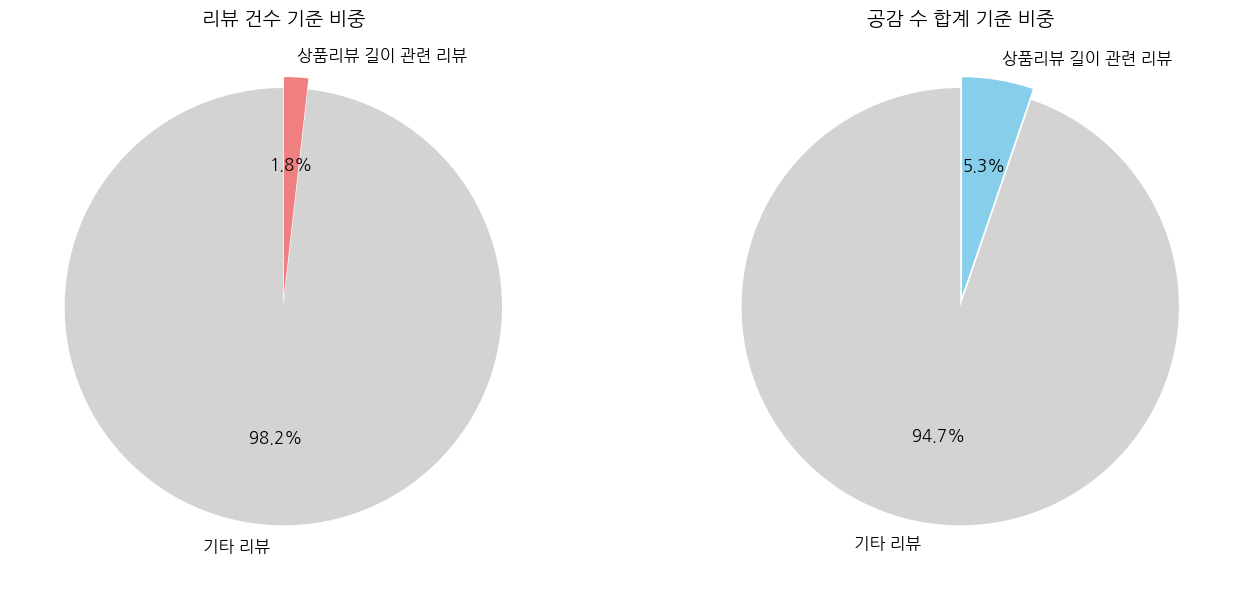

In [141]:
import matplotlib.pyplot as plt

# 개수 비교
total_count = len(data)
width_count = len(review_subset)
percent = width_count / total_count * 100

print(f"전체 리뷰 수: {total_count}")
print(f"상품리뷰 길이 관련 리뷰 수: {width_count} ({percent:.2f}%)")

# thumbsUpCount 합
width_thumbs_sum = review_subset['thumbsUpCount'].sum()
other_thumbs_sum = data['thumbsUpCount'].sum() - width_thumbs_sum

labels = ['상품리뷰 길이 관련 리뷰', '기타 리뷰']

# Figure 크기 키우기 & 좌우 순서 변경
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) 리뷰 건수 기준 (왼쪽)
sizes_count = [width_count, total_count - width_count]
axes[0].pie(
    sizes_count,
    explode=(0.05, 0),
    labels=labels,
    colors=['lightcoral', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[0].set_title("리뷰 건수 기준 비중", fontsize=14)

# 2) 좋아요 수 합계 기준 (오른쪽)
sizes_thumbs = [width_thumbs_sum, other_thumbs_sum]
axes[1].pie(
    sizes_thumbs,
    explode=(0.05, 0),
    labels=labels,
    colors=['skyblue', 'lightgray'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 12}
)
axes[1].set_title("공감 수 합계 기준 비중", fontsize=14)

plt.tight_layout()
plt.show()